<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [1]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?**

In [5]:
# Ваш код здесь
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак age) женщин?**

In [6]:
# Ваш код здесь
data[data['sex'] == 'Female']['age'].mean()

36.858230433571627

**3. Какова доля граждан Германии (признак native-country)?**

In [7]:
# Ваш код здесь
data['native-country'].value_counts(normalize=True)

United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

**4. Постройте гистограмму распределения (bar plot) образования людей (признак education).**

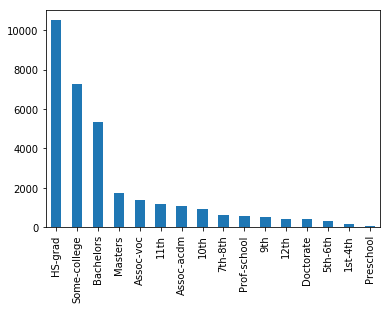

In [17]:
# Ваш код здесь
data['education'].value_counts().plot(kind='bar')

**5. Каковы средние и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год? **

In [18]:
# Ваш код здесь

data.groupby(['salary'])['age'].describe(percentiles=[])

salary       
<=50K   count    24720.000000
        mean        36.783738
        std         14.020088
        min         17.000000
        50%         34.000000
        max         90.000000
>50K    count     7841.000000
        mean        44.249841
        std         10.519028
        min         19.000000
        50%         44.000000
        max         90.000000
Name: age, dtype: float64

**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)**

In [20]:
# Ваш код здесь
pd.crosstab(data['salary'], data['education'])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
salary,,,,,,,,,,,,,,,,
<=50K,871,1115,400,162,317,606,487,802,1021,3134,107,8826,764,51,153,5904
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387


In [30]:
# l = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
# data[~data['education'].isin(l)]

**7. Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.**

In [35]:
# Ваш код здесь
data.groupby(['race', 'sex'])['age'].describe(percentiles=[])

race                sex          
Amer-Indian-Eskimo  Female  count      119.000000
                            mean        37.117647
                            std         13.114991
                            min         17.000000
                            50%         36.000000
                            max         80.000000
                    Male    count      192.000000
                            mean        37.208333
                            std         12.049563
                            min         17.000000
                            50%         35.000000
                            max         82.000000
Asian-Pac-Islander  Female  count      346.000000
                            mean        35.089595
                            std         12.300845
                            min         17.000000
                            50%         33.000000
                            max         75.000000
                    Male    count      693.000000
                

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)?**

In [40]:
# Ваш код здесь
temp = data[data['salary'] == '>50K']
pd.crosstab(temp['salary'], temp['marital-status'], normalize=True)

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
salary,,,,,,,
>50K,0.059049,0.001275,0.853463,0.004336,0.06262,0.008417,0.01084


**9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [47]:
# Ваш код здесь
data.describe()
temp = data[data['hours-per-week'] == 99]
print(temp.shape)
temp['salary'].value_counts(normalize=True)

(85, 15)


<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

**10. Посчитайте среднее время работы (hours-per-week) зарабатывающих много и мало (salary) для каждой страны (native-country).**

In [50]:
# Ваш код здесь
data.pivot_table(['hours-per-week'], ['native-country', 'salary'], aggfunc='mean').head(50)

hours-per-week
native-country     salary                
?                  <=50K        40.164760
                   >50K         45.547945
Cambodia           <=50K        41.416667
                   >50K         40.000000
Canada             <=50K        37.914634
                   >50K         45.641026
China              <=50K        37.381818
                   >50K         38.900000
Columbia           <=50K        38.684211
                   >50K         50.000000
Cuba               <=50K        37.985714
                   >50K         42.440000
Dominican-Republic <=50K        42.338235
                   >50K         47.000000
Ecuador            <=50K        38.041667
                   >50K         48.750000
El-Salvador        <=50K        36.030928
                   >50K         45.000000
England            <=50K        40.483333
                   >50K         44.533333
France             <=50K        41.058824
                   >50K         50.750000
Germany            <=50K        39.139785
                   >50K         44.977273
Greece             <=50K        41.809524
                   >50K         50.625000
Guatemala          <=50K        39.360656
                   >50K         36.666667
Haiti              <=50K        36.325000
                   >50K         42.750000
Holand-Netherlands <=50K        40.000000
Honduras           <=50K        34.333333
                   >50K         60.000000
Hong               <=50K        39.142857
                   >50K         45.000000
Hungary            <=50K        31.300000
                   >50K         50.000000
India              <=50K        38.233333
                   >50K         46.475000
Iran               <=50K        41.440000
                   >50K         47.500000
Ireland            <=50K        40.947368
                   >50K         48.000000
Italy              <=50K        39.625000
                   >50K         45.400000
Jamaica            <=50K        38.239437
                   >50K         41.100000
Japan              <=50K        41.000000
                   >50K         47.958333
Laos               <=50K        40.375000